ChEn-3170: Computational Methods in Chemical Engineering Spring 2024 UMass Lowell; Prof. V. F. de Almeida **25Mar24**

# 10. Shortest Least-Squares Solver
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Any Linear System (Detailed Algorithm)](#any)
* [Shortest LSQ Solver](#usolver)
* [Anomalous Least-Squares Data Fitting](#fit)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-shortest-lsq-solver](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EqrHIQZxGsdKnllQsn2RmvMBlIFaz2TtXan8aldgK6WWuw?e=Z7EnCh) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

Compute the solution vector $\xvec$ for a given matrix $\Amtrx$ and right-side vector $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

When $\Amtrx$ is rank deficient, $\Amtrx^\top\Amtrx$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec },
\end{equation*}

*either have an infinite number of solutions or have no solution*. 

Since $\Amtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\xvec_\text{MNLS}$, exists as follows,

\begin{equation*}
\min\limits_\xvec \Bigl( \norm{\bvec - \Amtrx\,\xvec_\text{MNLS}}^2 +  \lim\limits_{\epsilon\rightarrow 0}\,\epsilon\,\norm{\xvec_\text{MNLS}}^2 \Bigr) \quad\  \forall \quad\ \xvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Amtrx^\top\Amtrx + \epsilon\Imtrx\bigr) \xvec_\text{MNLS}  = \Amtrx^\top\,\bvec },
\end{equation*}

where $\Amtrx^\top\Amtrx + \epsilon\Imtrx$ is square, symmetric and full rank. This augmented least-squares problem has a unique solution.

## [Any Linear System (Detailed Algorithm)](#toc)<a id="any"></a>
Refer to course Notebooks 08 and 09.

In [1]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -12.2
b =  88.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-8:] = 0.0
    if nrows < ncols:
        a_mtrx[-8:,:] = 0.0
        
np.set_printoptions(precision=3, threshold=500, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 85.944  20.078  83.884  27.978 ...  67.787  -4.829  19.89   52.703]
 [ 53.198  74.564  63.555  26.032 ...   1.464  40.026  85.413  21.987]
 [ 10.03    0.803  14.487  30.992 ...  58.807  71.614   7.179  84.283]
 [-10.183  52.064  61.402  78.183 ...  73.745   0.149  -3.439  27.797]
 ...
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]]


In [2]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  12
Matrix is rank deficient.


In [3]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-29.013  -2.332  -0.781 -24.885 -13.344  -1.029 -39.576 -38.359 -16.076 -40.098 -38.047   2.679
 -38.663  -8.202 -23.087 -26.119   1.59  -13.636 -21.685  -0.067]


In [4]:
'''Compute the MNLS solution'''

import numpy as np

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own solve function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-7,8)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

x_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    mtrx = a_mtrx.transpose() @ a_mtrx + epsilon * np.eye(a_mtrx.shape[1]) # AT A + epsilon I, AT A is the normal matrix
    vec  = a_mtrx.transpose() @ b_vec                            # AT b

    # Solve (ATA + epsilon I) x = AT b
    x_vec = solve(mtrx, vec, pivoting_option='complete', pivot_tol=epsilon_values[-1], zero_tol=1e-10) # matrix is full rank
    #x_vec = np.linalg.solve(mtrx, vec) # if my solver does not work
        
    x_norm = np.linalg.norm(x_vec)
    print('||x|| = %8.5e'%x_norm)
    
    x_norm_history.append(x_norm) # save for plotting
    
    # test my solution against NumPy solve
    print('max(abs(x_vec-x_vec_numpy)) = %2.2e'%np.max(np.abs((x_vec - np.linalg.solve(mtrx, vec)))))
    
    print('')
    residual_vec = b_vec - a_mtrx @ x_vec
    print('||b - A x||^2 + eps*||x||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*x_norm**2))
    print('||(ATA-epsI)x - ATb||       = %8.5e'%(np.linalg.norm(mtrx@x_vec-a_mtrx.transpose()@b_vec)))
    print('||b - A x|| +       ||x||   = %8.5e'%(np.linalg.norm(residual_vec) + x_norm))
    print('||b - A x||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

||x|| = 4.49395e-01
max(abs(x_vec-x_vec_numpy)) = 4.44e-14

||b - A x||^2 + eps*||x||^2 = 3.45637e+03
||(ATA-epsI)x - ATb||       = 1.13959e-11
||b - A x|| +       ||x||   = 5.90683e+01
||b - A x||                 = 5.86189e+01

epsilon = 5.2e+00

||x|| = 4.52787e-01
max(abs(x_vec-x_vec_numpy)) = 7.36e-13

||b - A x||^2 + eps*||x||^2 = 3.43708e+03
||(ATA-epsI)x - ATb||       = 1.27004e-11
||b - A x|| +       ||x||   = 5.90703e+01
||b - A x||                 = 5.86175e+01

epsilon = 2.7e-01

||x|| = 4.52965e-01
max(abs(x_vec-x_vec_numpy)) = 7.89e-12

||b - A x||^2 + eps*||x||^2 = 3.43607e+03
||(ATA-epsI)x - ATb||       = 1.23034e-11
||b - A x|| +       ||x||   = 5.90705e+01
||b - A x||                 = 5.86175e+01

epsilon = 1.4e-02

||x|| = 4.52974e-01
max(abs(x_vec-x_vec_numpy)) = 2.37e-10

||b - A x||^2 + eps*||x||^2 = 3.43602e+03
||(ATA-epsI)x - ATb||       = 1.18584e-11
||b - A x|| +       ||x||   = 5.90705e+01
||b - A x||                 = 5.86175e+01

epsilon

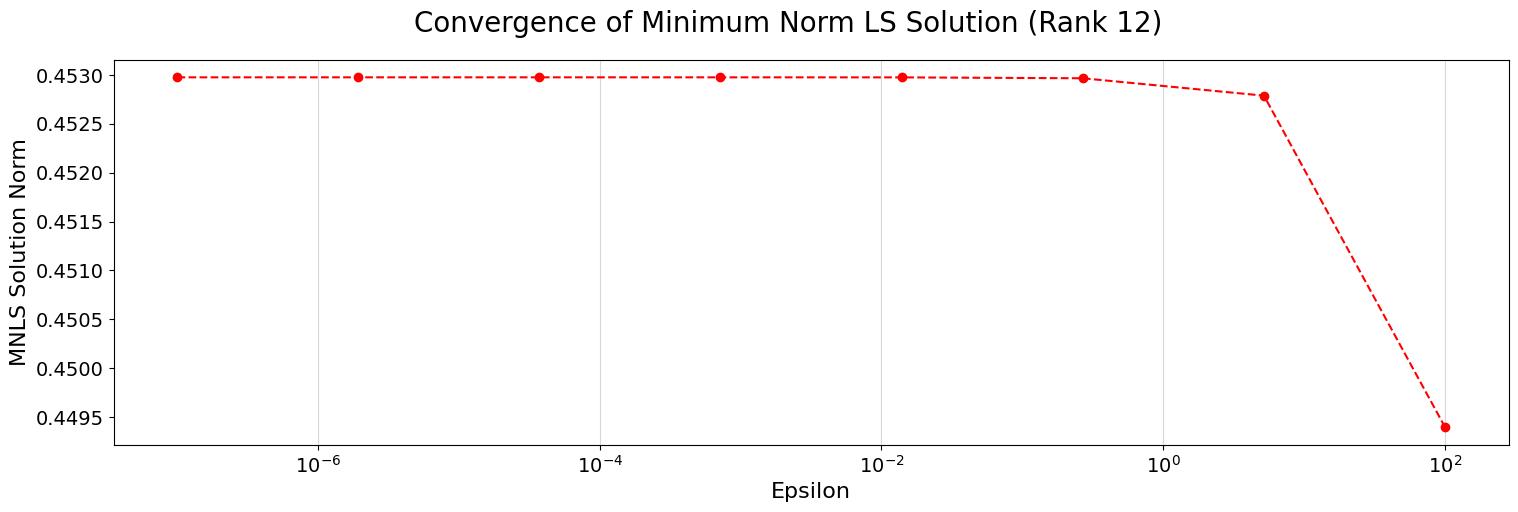

In [5]:
'''Plot Convergence of the Shortest Least-Square Solution Vector'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(18,5))
ax.semilogx(epsilon_values, x_norm_history,'ro--')
ax.set_ylabel('MNLS Solution Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS Solution (Rank %s)'%str(a_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

**NB:** Note that from the previous results, the associated rank-deficient $\Amtrx\xvec=\bvec$ has no solution. The computed $\xvec$ is the shortest LS solution of the modified (*regularized*) LS problem.

In [6]:
print('||AT(b - A x)|| = %8.5e'%(np.linalg.norm(a_mtrx.transpose()@residual_vec)))

||AT(b - A x)|| = 4.52972e-08


**NB:** For example take a non-zero vector, $\yvec$, from the null space of $\Amtrx$, *i.e.* $\Amtrx\yvec=\zerovec$. $\yvec$ will be perpendicular to $\xvec$.

In [7]:
y0_vec = np.random.random(a_mtrx.shape[1])
y_vec = solve(a_mtrx, b_vec*0, y0_vec, zero_tol=1e-10)
print('||y||        = %8.5e'%(np.linalg.norm(y_vec)))
print('||A y)||     = %8.5e'%(np.linalg.norm(a_mtrx@y_vec)))
print('||b - A y)|| = %8.5e'%(np.linalg.norm((b_vec-a_mtrx@y_vec))))
print('||x||        = %8.5e'%(np.linalg.norm(x_vec)))
print('y . x        = %8.5e'%(np.dot(y_vec, x_vec)))

||y||        = 7.28626e+00
||A y)||     = 2.67853e-13
||b - A y)|| = 1.06962e+02
||x||        = 4.52975e-01
y . x        = -1.13461e-04


**NB:** More trials.

In [8]:
a = 2*x_vec.min()
b = 2*x_vec.max()

for i in range(10):
    y0_vec = (b-a)*np.random.random(ncols) + a
    y_vec = solve(a_mtrx, b_vec*0, y0_vec, zero_tol=1e-10)
    print('||y||       = %8.5e'%(np.linalg.norm(y_vec)))
    print('||b - A y|| = %8.5e'%(np.linalg.norm((b_vec-a_mtrx@y_vec))))
    print('y . x       = %8.5e'%(np.dot(y_vec, x_vec)))
    print('')

||y||       = 1.51814e+00
||b - A y|| = 1.06962e+02
y . x       = 2.92669e-06

||y||       = 9.74784e-01
||b - A y|| = 1.06962e+02
y . x       = 1.59039e-05

||y||       = 1.51663e+00
||b - A y|| = 1.06962e+02
y . x       = 3.81832e-06

||y||       = 1.52927e+00
||b - A y|| = 1.06962e+02
y . x       = 3.84443e-05

||y||       = 1.04497e+00
||b - A y|| = 1.06962e+02
y . x       = -4.86699e-06

||y||       = 1.90523e+00
||b - A y|| = 1.06962e+02
y . x       = 2.15823e-05

||y||       = 1.51817e+00
||b - A y|| = 1.06962e+02
y . x       = 1.35085e-05

||y||       = 1.45748e+00
||b - A y|| = 1.06962e+02
y . x       = -3.31434e-05

||y||       = 1.32720e+00
||b - A y|| = 1.06962e+02
y . x       = -4.20328e-05

||y||       = 1.79945e+00
||b - A y|| = 1.06962e+02
y . x       = -1.07227e-05



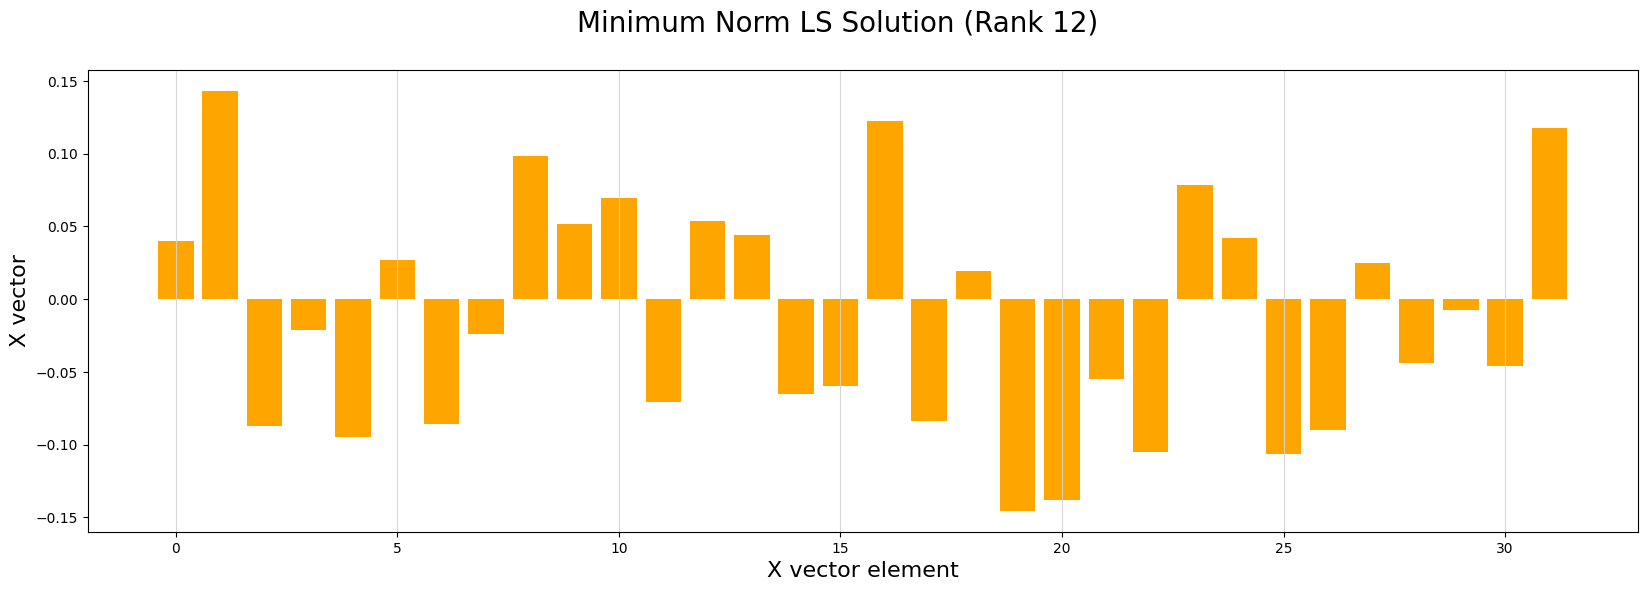

In [9]:
'''Minimum-norm least-squares solution'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Solution (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Shortest LSQ Solver](#toc)<a id="usolver"></a>

Compute the solution vector $\xvec$, given $\Amtrx$ and $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

In [10]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a
a_mtrx /= a_mtrx.max()

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=100, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 0.07   0.295  0.983 -0.118 ... -0.113  0.818  0.053  0.506]
 [ 0.605  0.817  0.639  0.974 ...  0.559  0.735  0.291  0.67 ]
 [ 0.211  0.846  0.879  0.098 ... -0.009  0.268  0.953  0.962]
 [ 0.881  0.053  0.038  0.162 ...  0.402  0.162  0.442  0.25 ]
 ...
 [ 0.12   0.934  0.952  0.363 ...  0.553  0.322  0.736  0.828]
 [ 0.482  0.312  0.949  0.555 ... -0.074  0.151  0.098  0.338]
 [-0.015  0.582  0.638  0.151 ...  0.74   0.207  0.382  0.261]
 [ 0.     0.     0.     0.    ...  0.     0.     0.     0.   ]]


In [11]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [12]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-13.81   -0.387 -26.173 -33.964   1.576 -31.098 -22.087 -39.814 -23.662 -37.911  -1.336  -1.402
  -4.678 -23.134   2.254  -5.318 -29.79  -17.982 -25.524 -35.675]


In [13]:
import numpy as np

try:    
    from chen_3170.toolkit import shortest_least_squares_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# wrapper function
x_vec = shortest_least_squares_solve(a_mtrx, b_vec, verbose=False, solver_verbose=False)

print('Magnitude of residual vector: ||b - Ax|| = %3.3e'%np.linalg.norm(b_vec-a_mtrx@x_vec))
print('Magnitude of residual vector of the normal equations: ||AT(b - Ax)|| = %3.3e'%np.linalg.norm(a_mtrx.transpose()@(b_vec-a_mtrx@x_vec)))

Magnitude of residual vector: ||b - Ax|| = 3.567e+01
Magnitude of residual vector of the normal equations: ||AT(b - Ax)|| = 4.869e-07


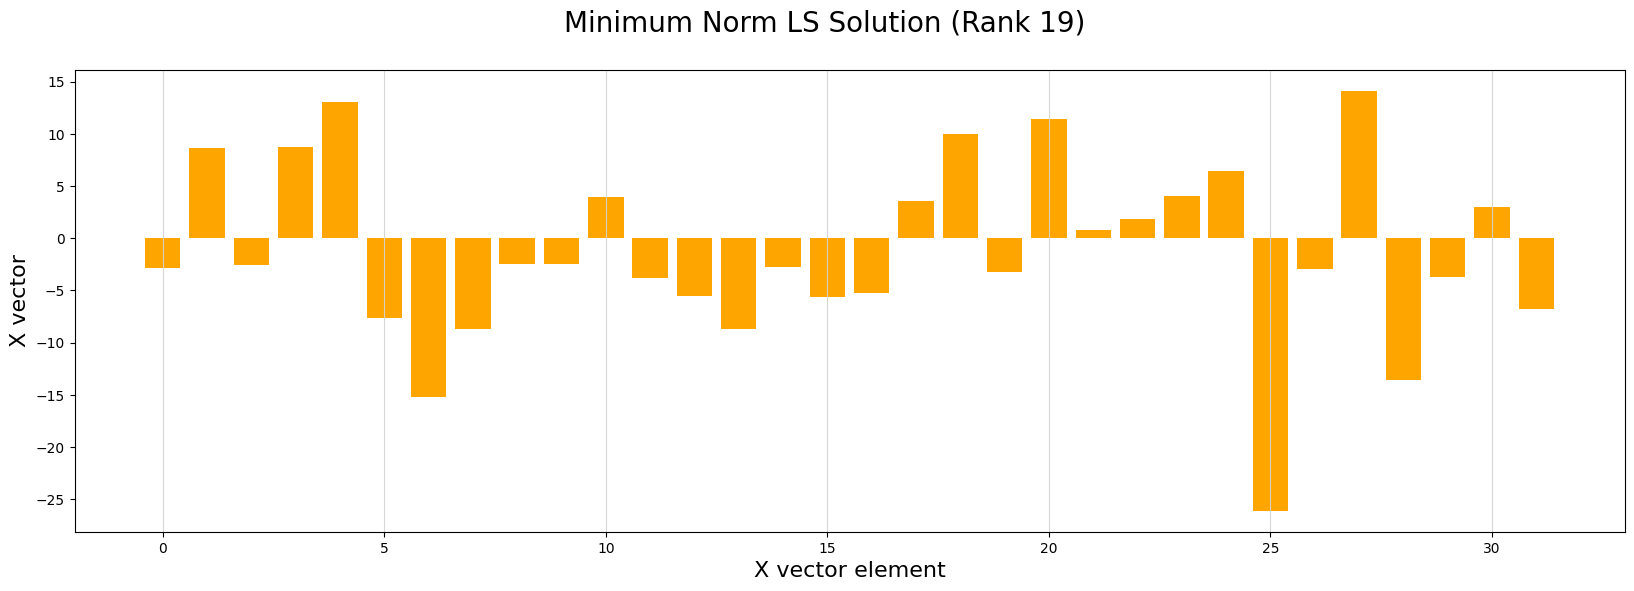

In [14]:
'''Minimum norm least-squares solution'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
#%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Solution (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Anomalous Linear Least-Squares Data Fitting](#toc)<a id="fit"></a>

Example of data fitting where the shortest least-square solver is the only way to find a satisfactory fit.

In [15]:
import numpy as np

m_pts = 7

x_values = 1*np.ones(m_pts)
y_values = 1.12 * abs(np.random.random(m_pts))

a_mtrx = np.zeros((m_pts, 2))
a_mtrx[:,0] = np.ones(m_pts)
a_mtrx[:,1] = -x_values


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

plt.plot(x_values, y_values, 'r*', label='experimental')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.ylabel(r'$y$ []',fontsize=14)
plt.xlim(min(x_values)-.1, max(x_values)+.1)
plt.title('Some Arbitrary Data',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

rank = matrix_rank(a_mtrx)

if rank == min(np.shape(a_mtrx)):
    print('Full-rank matrix')
else:
    print('Rank-deficient matrix')
print('matrix rank = ', rank)

In [ ]:
try:    
    from chen_3170.toolkit import shortest_least_squares_solve  
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'
    
x_vec = shortest_least_squares_solve(a_mtrx, y_values)

#this will not work: x_vec = solve(a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@y_values, pivot_tol=1e-7)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

n_plot_pts = 15
x_plot = np.linspace(min(x_values)-.01, max(x_values)+.01, n_plot_pts)
a_mtrx_x = np.ones((n_plot_pts, 2))
a_mtrx_x[:,1]= -x_plot

plt.plot(x_values, y_values,'r*',label='experimental')
plt.plot(x_plot, a_mtrx_x@x_vec,'y*',label='MNLS')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.xlim(min(x_values)-.01, max(x_values)+.01)
plt.ylabel(r'$y$ []',fontsize=14)
plt.title('Linear Least-Squared Approximation',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_values

In [ ]:
y_values.mean()

In [ ]:
a_mtrx_x@x_vec

In [ ]:
(a_mtrx_x@x_vec).mean()